# GRIP At The Sparks Foundation

## NAME : MAHISHA PATEL

### TASK 4 : To Explore Decision Tree Algorithm

### For the given ‘Iris’ dataset, create the Decision Tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

In [1]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import sklearn.datasets as datasets #For loading iris dataset

In [2]:
# Loading the iris dataset
iris=datasets.load_iris()

# Forming the iris dataframe
df=pd.DataFrame(iris.data, columns=iris.feature_names)
print(df.head(10))

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
5                5.4               3.9                1.7               0.4
6                4.6               3.4                1.4               0.3
7                5.0               3.4                1.5               0.2
8                4.4               2.9                1.4               0.2
9                4.9               3.1                1.5               0.1


In [4]:
#split dataset in features and target variable
X = df
y = iris.target
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [5]:
# Split dataset into training set and test set into ratio of 0.75:0.25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [6]:
# Create Decision Tree classifer object
classifier = DecisionTreeClassifier()

# Train Decision Tree Classifer
classifier = classifier.fit(X_train,y_train)

print("Decision Tree Classifier created successfully!")

Decision Tree Classifier created successfully!


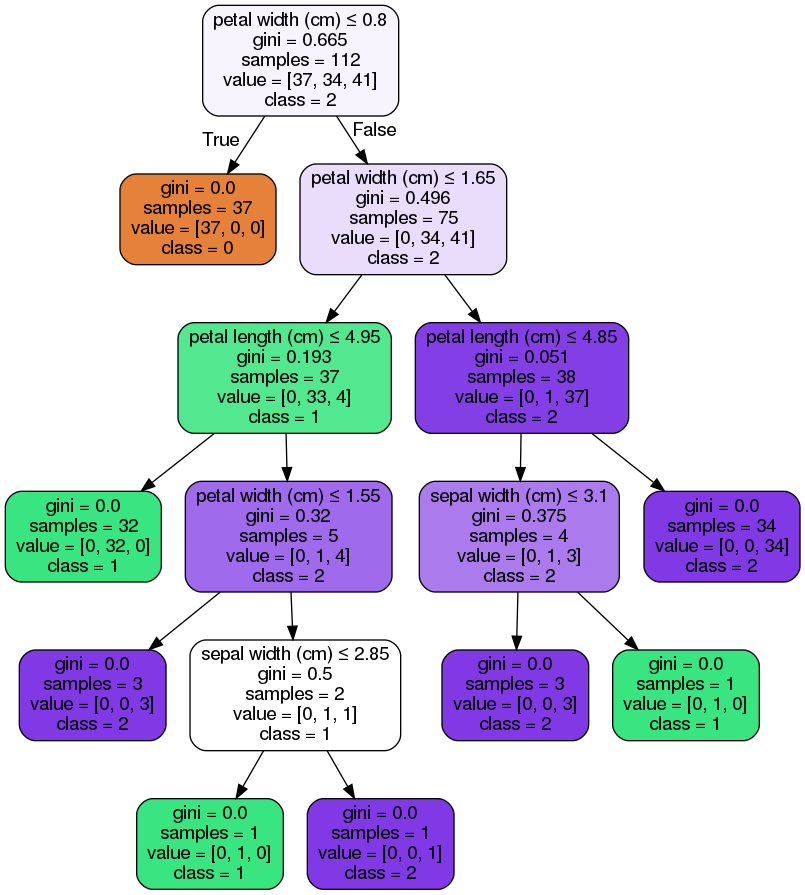

In [7]:
# Visualize the decision tree
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names=iris.feature_names,class_names=['0','1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('iris.png')
Image(graph.create_png())

In [8]:
#Predict the response for test dataset
y_pred = classifier.predict(X_test)

#Compare between predicted and actual class
df = pd.DataFrame({'Predicted Class':y_pred, 'Actual Class':y_test})
print(df.head(10))

   Predicted Class  Actual Class
0                0             0
1                1             1
2                1             1
3                0             0
4                2             2
5                1             1
6                2             2
7                0             0
8                0             0
9                2             2


In [9]:
# Model Accuracy
print("Accuracy of Decision Tree Classifier:",metrics.accuracy_score(y_test, y_pred))

Accuracy of Decision Tree Classifier: 0.9736842105263158


In [10]:
#Creating confusion matrix and report
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

